## Scénario
Vous êtes employé dans une banque, présente dans de nombreux pays à travers le monde. Celle-ci souhaite cibler de nouveaux clients potentiels, plus particulièrement les jeunes en âge d'ouvrir leur tout premier compte bancaire.

Cependant, elle souhaite cibler les prospects les plus susceptibles d'avoir, plus tard dans leur vie, de hauts revenus.

L'équipe dans laquelle vous travaillez a donc reçu pour mission de créer un modèle permettant de déterminer le revenu potentiel d'une personne.

Ainsi, vous proposez une régression linéaire avec 3 variables :

- le revenu des parents ;
- le revenu moyen du pays dans lequel habite le prospect ;
- l'indice de Gini calculé sur les revenus des habitants du pays en question.

## Mission 4
Pour cette mission 4, nous chercherons à expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenus des parents, etc.

Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.

Chapitre à réviser pour la mission 4 :

ANOVA à un facteur variable explicative le pays de l’individu :
- ANOVA pour tester l'influence du pays de l’individu sur le revenu moyen des individus ( income - country_code ), la variance de 'income' peut être expliquer par la variable 'pays'.
- Test de Fisher pour savoir si le pays à une influence sur le revenus moyen des individus

Comparaison de l'ANOVA avec le logarithme du revenu de l'individu :
Le modèle sera t-il plus performant? Le but ici est de pouvoir déterminer l'impact du logarithme sur l'ANOVA.
- faire la même manip que précedement mais en changeant la variable 'income' en logarithme income

Regression Linéaire
Régression linéaire sur nos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par le(s) modèle(s) ?
- même manip mais avec 3 variables (income ~ gini, income_moyenne)

Seconde Régression Linéaire : Logarithme du Revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu
- meme manip avec 3 variables mais cette fois logarithmé pour savoir si la performance est meilleur (ln_income ~ gini, ln_income_moyenne)

Comparaison des régressions linéaires en utilisant Scikit-Learn :
- utiliser la fonctions 'linear_model' pour comparer les deux régressions utilisé précedement

Diagnostic de la régression linéaire des deux modèles (sans et avec logarithme) :
- sur ces deux régression lequels suivent une meilleur loi gaussienne (graphique)

- Autre visualisation de la distribution des résidus :
Le graphique qqplot permet de vérifier la compatibilité de deux distributions. Dans notre cas, nous confrontons la distribution empirique des résidus avec la distribution théorique de la loi normale. On parle aussi de Droite de Henry. L’hypothèse nulle (normalité) est rejetée si la série de points s’écarte manifestement de la diagonale.

- Test d'adéquation à une loi normale : la statistique de Kolmogorov-Smirnov
On peut se douter que la distribution de nos résidus n'est pas "parfaite". Vérifions-le par les chiffres. L'échantillon étant de forte volumétrie, le test se fera selon Kolmogorov-Smirnov et non Shapiro-Wilk.

- Test de colinéarité de nos deux modèles
Vérification d'une éventuelle colinéarité approchée des variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

- Test d’homoscédasticité (constance des variables ) par Breusch-Pagan :
Ce test consiste à vérifier la constance de la variation des résidus. En cas d'hétéroscédasticité, la variance de l'erreur n'est pas constante. Dans le cas contraire, (hypothèse d'homoscédasticité) la variance de l'erreur est constante.
sms.het_breuschpagan

- Détection des points atypiques et influents
Les deux précédents modèles, issus du résultat de la régression, seront utilisés pour analyser les points influents.
Les tests seront fait à un niveau alpha de 5%
n sera le nombre d'individus de l'échantillon, et p le nombre de variables :

- Analyse des leviers avec seuil :
Le seuil des leviers est de 2 * p/n
get_influence().hat_matrix_diag + graphique

à quoi correspondent ces leviers, quels sont ces pays hors seuil?

quels model est le plus performant ? celui à l'echelle logarithmé ou celui à l'échelle linéaire

- Analyse des résidus studentisés (standardisés) graphiquement & en pourcentage :
Le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté.
Il nécessaire d'observer le rôle conjoint du levier et du résidu standardisé.

- Analyse de la distance de Cook :
Toujours à l'aide de statsmodels la distance de Cook permettra de mieux estimer les influents.

refaire toutes les analyses statistiques en incluant la variable 'revenus des parents' ce qui nous fera un total de 4 variables.

In [1]:
# Importation des librairies nécessaire à l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, cluster, metrics, decomposition
from sklearn.cluster import KMeans
import scipy.stats as st
from collections import Counter
import plotly.express as px
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms

#Paramètres de style de nos prochains graphique
plt.style.use('ggplot')

# Importation de mon dataframe de travail
df_500 = pd.read_csv('df_mission4.csv')

# Extrait aléatoire à hauteur de 25% de mon dataframe d'origine car mon pc n'arrive 
# pas à supporter le calcul de 5.8M d'individus
df_500 = df_500.sample(frac = 0.25, axis = 0)

# Visualisation du dataframe
display(df_500.head())
display(df_500.shape)

,country,mj,country_code,quantile,income,Gj,pj,y_child,y_parents,c_i_parent
1124652,Croatia,7716.465790,HRV,53,6749.6113,0.30,0.464077,1.641855,5.261404,96
1117713,Croatia,7716.465790,HRV,14,3747.9320,0.30,0.464077,1.453733,1.358711,63
92901,Argentina,5847.884654,ARG,2,470.5015,0.45,0.660000,1.402886,1.508370,66
2074462,Honduras,3296.268419,HND,63,2418.6306,0.56,0.660000,1.531215,0.816413,42
300426,Belarus,3921.163534,BLR,27,2579.6372,0.28,0.342738,4.857890,0.959364,49


(1450000, 10)

## ANOVA : De la variable explicative 'country'(pays de l'individu) sur les autres variables

Voyons pas le biais d'un graphique 'boxplot' la distribution du revenus de nos individus sur l'échantillon utilisé dans la mission 2(Luxembourg, United States, South Africa, Russian Federation, The Former Yugoslav Republic of Macedonia, Republic of Korea, France).

In [2]:
# Liste des pays sélectionner
liste_pays = ['Luxembourg', 'United States', 'South Africa', 'Russian Federation', 'The Former Yugoslav Republic of Macedonia', 'Republic of Korea', 'France']
df_liste_pays = df_500[df_500['country'].isin(liste_pays)]

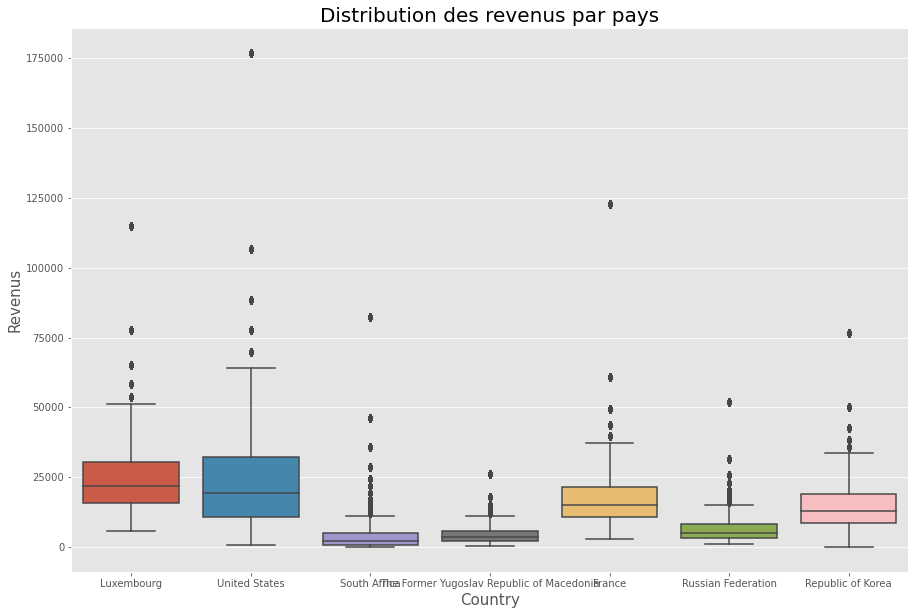

In [3]:
# Création de notre boxplot
plt.figure(figsize=(15, 10))

ax = sns.boxplot(x = 'country', y = 'income', data = df_liste_pays)
plt.title('Distribution des revenus par pays', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Revenus', fontsize = 15)

plt.savefig('Graphs/Distribution_des_revenus.png')
plt.show()

On peut constater certaines différences de distribution selon les pays, l'analyse de la variance va nous indiquer si la différence est réelement significatif ou non.

In [4]:
# réduction du chiffre après la virgule et du type de nos valeurs car mon pc n'est pas assez puissant
df_500['income'] = df_500['income'].apply(lambda x: round(x, 1)).astype(np.float32)
df_500['Gj'] = df_500['Gj'].apply(lambda x: round(x, 1)).astype(np.float32)
df_500['pj'] = df_500['pj'].apply(lambda x: round(x, 1)).astype(np.float32)
df_500['mj'] = df_500['mj'].apply(lambda x: round(x, 1)).astype(np.float32)

In [5]:
# Analyse de la variance de la variable explicative 'country' sur la variable qu'on cherche à expliquer 'income'
alpha = 0.05
anova_income = smf.ols('income ~ country', data = df_500).fit(alpha=alpha)
anova_income.summary().tables[0]

Dep. Variable:,income,R-squared:,0.497
Model:,OLS,Adj. R-squared:,0.497
Method:,Least Squares,F-statistic:,1.244e+04
Date:,"Fri, 18 Mar 2022",Prob (F-statistic):,0.00
Time:,18:07:43,Log-Likelihood:,-1.4827e+07
No. Observations:,1450000,AIC:,2.965e+07
Df Residuals:,1449884,BIC:,2.966e+07
Df Model:,115,,
Covariance Type:,nonrobust,,


R² = 0.50, on peut en conclure que la variable explicative 'country' explique près de 50% de la variance de la variable 'income'. Le reste, donc la moitié de la variance sur le revenu est expliquée par les autres facteurs non considérés dans ce modèle.

In [6]:
# Test de Fisher qui va nous aider à comparer la variance de notre variable 'country', pour définir si notre hypothèse 'H0' est rejeté ou non
# notes : le numérateur doit être supérieur au dénominateur,
sm.stats.anova_lm(anova_income, typ=2)

,sum_sq,df,F,PR(>F)
country,6.381183e+13,115.0,12438.952026,0.0
Residual,6.467744e+13,1449884.0,NaN,NaN


Le p-valeur de se test est de 0.0, ce qui nous indique que notre hypothèse h0 est rejetée et par conséquent que la variable 'pays' à bien une influence sur notre variable 'income'.

### Répétition de la manipulation mais cette fois à l'échelle logarithmique

In [7]:
# Création d'une variable logarithme 'ln_income'
df_500['ln_income'] = np.log(df_500['income'])

# réduction du chiffre après la virgule et du type de nos valeurs car mon pc n'est pas assez puissant
df_500['ln_income'] = df_500['ln_income'].apply(lambda x: round(x, 1)).astype(np.float32)

In [8]:
# Répétition du calcul de l'ANOVA sur la variables explicative 'country' sur la variable 'income'
anova_ln_income = smf.ols('ln_income ~ country', data = df_500).fit(alpha=alpha)
anova_ln_income.summary().tables[0]

Dep. Variable:,ln_income,R-squared:,0.730
Model:,OLS,Adj. R-squared:,0.730
Method:,Least Squares,F-statistic:,3.403e+04
Date:,"Fri, 18 Mar 2022",Prob (F-statistic):,0.00
Time:,18:08:18,Log-Likelihood:,-1.5778e+06
No. Observations:,1450000,AIC:,3.156e+06
Df Residuals:,1449884,BIC:,3.157e+06
Df Model:,115,,
Covariance Type:,nonrobust,,


In [9]:
# Test de Fisher qui va nous aider à comparer les variances de nos deux variables
sm.stats.anova_lm(anova_ln_income, typ=2)

,sum_sq,df,F,PR(>F)
country,2.019376e+06,115.0,34026.516957,0.0
Residual,7.482298e+05,1449884.0,NaN,NaN


En ayant logarithmé notre 'income'(revenus) cette fois la variance est expliqué à hauteur de 73% tout en conservant une P-value de 0.0%.

### Régression linéaire

Réalisons une régression linéaire sur nos données mais cette fois en ayant 2 variables explicatives l'indice de Gini et le revenus moyen du pays. Tout en comparant nos deux variables dépendantes 'income' & 'ln_income'.

In [10]:
# Création du modèle de régression linéaire avec la variable 'income'
lineaire_income = smf.ols('income ~ Gj + mj', data = df_500).fit(alpha=alpha)
lineaire_income.summary().tables[0]

Dep. Variable:,income,R-squared:,0.497
Model:,OLS,Adj. R-squared:,0.497
Method:,Least Squares,F-statistic:,7.152e+05
Date:,"Fri, 18 Mar 2022",Prob (F-statistic):,0.00
Time:,18:08:21,Log-Likelihood:,-1.4827e+07
No. Observations:,1450000,AIC:,2.965e+07
Df Residuals:,1449997,BIC:,2.965e+07
Df Model:,2,,
Covariance Type:,nonrobust,,


Toujours le même résultat de variance expliquée à hauteur d'environ ~50%, voyons avec un graphique notre modèle de regression linéaire.

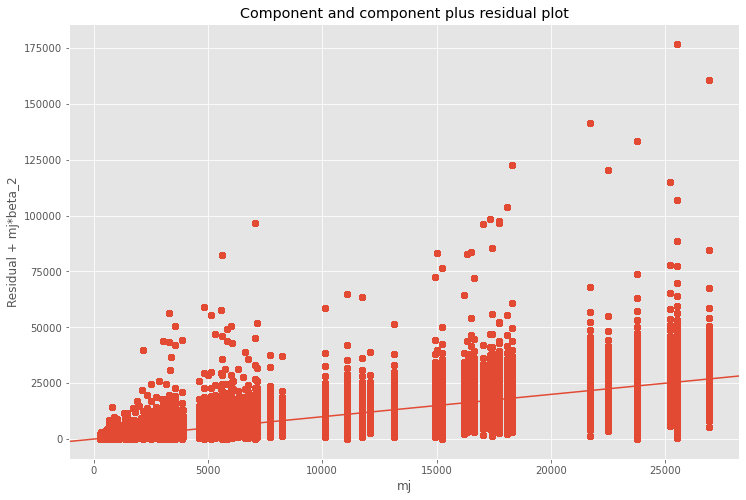

In [11]:
# Visualisation de notre régression linéaire 
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_ccpr(lineaire_income, 'mj', ax=ax)
plt.show()

Comparons dorénavant ce premier modèle avec le deuxième logarithmé.

In [12]:
# Changeons nos valeurs de la variables 'mj' pour qu'elles soient logarithmé
df_500['ln_mj'] = np.log(df_500['mj'])

# réduction du chiffre après la virgule et du type de nos valeurs car mon pc n'est pas assez puissant
df_500['ln_mj'] = df_500['ln_mj'].apply(lambda x: round(x, 1)).astype(np.float32)

# Création du modèle de régression linéaire avec la variable 'ln_mj'
lineaire_ln_income = smf.ols('ln_income ~ Gj + ln_mj', data = df_500).fit(alpha=alpha)
lineaire_ln_income.summary().tables[0]

Dep. Variable:,ln_income,R-squared:,0.727
Model:,OLS,Adj. R-squared:,0.727
Method:,Least Squares,F-statistic:,1.933e+06
Date:,"Fri, 18 Mar 2022",Prob (F-statistic):,0.00
Time:,18:08:27,Log-Likelihood:,-1.5841e+06
No. Observations:,1450000,AIC:,3.168e+06
Df Residuals:,1449997,BIC:,3.168e+06
Df Model:,2,,
Covariance Type:,nonrobust,,


Comme pour le premier modèle le résultat de notre régression reste la même que pour notre ANOVA qui nous permet d'expliquer 73% de la variance. Ce qui reste supérieur à notre premier modèle.

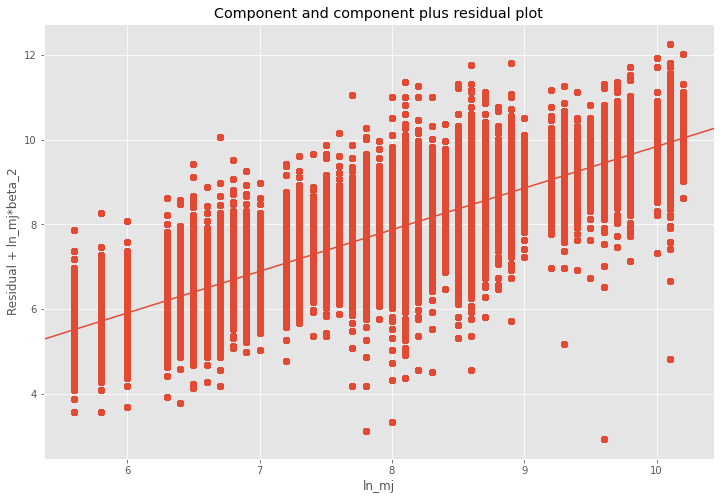

In [13]:
# Visualisation de notre régressions sur la variance de nos individus
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_ccpr(lineaire_ln_income, 'ln_mj', ax=ax)
plt.show()

#### Pour la suite du projet nous allons continuer nos analyse à partir du modèle 2 (logarithmé) car ce modèle est plus performant que le 1er.

### Décomposition de la variance totale expliquée

La décomposition de la variance est formulé comme : Somme des Carrées Totaux = Somme des Carrées Expliquée + Somme des Carrées Résiduelle => SCT = SCE + SCR

In [14]:
decomp_ln_linear = sms.anova_lm(lineaire_ln_income, typ=2)
decomp_ln_linear

,sum_sq,df,F,PR(>F)
Gj,2.442130e+04,1.0,4.691619e+04,0.0
ln_mj,1.709944e+06,1.0,3.285004e+06,0.0
Residual,7.547676e+05,1449997.0,NaN,NaN


In [15]:
#SCT
print('SCT = ' + str(decomp_ln_linear.values[:,0].sum()))

#SCE
print('SCE = ' + str(decomp_ln_linear.values[0,0] + decomp_ln_linear.values[1,0]))

#SCR
print('SCR = ' + str(decomp_ln_linear.values[2,0]))

#R2 squared
print('R² = ' + str((decomp_ln_linear.values[0,0] + decomp_ln_linear.values[1,0]) / decomp_ln_linear.values[:,0].sum()))

#Variance expliquée par le revenu moyen du pays (ln_mj)
print("La variable 'ln_mj' explique : {}% de la variance".format(round(sm.stats.anova_lm(lineaire_ln_income, typ=2).values[1,0] / decomp_ln_linear.values[:,0].sum(), 3)))

#Variance expliquée par l'indice de Gini
print("La variable 'Gj' explique : {}% de la variance".format(round(sm.stats.anova_lm(lineaire_ln_income, typ=2).values[0,0] / decomp_ln_linear.values[:,0].sum(), 3)))

#Les résidus
print("Les résidus explique : {}% de la variance".format(round(sm.stats.anova_lm(lineaire_ln_income, typ=2).values[2,0] / decomp_ln_linear.values[:,0].sum(), 3)))

SCT = 2489133.2839020677
SCE = 1734365.6970726785
SCR = 754767.5868293892
R² = 0.6967749410163426
La variable 'ln_mj' explique : 0.687% de la variance
La variable 'Gj' explique : 0.01% de la variance
Les résidus explique : 0.303% de la variance


## Analyse de nos résidus pour pouvoir valider notre modèle

Nous cherchons à savoir si nos résidus suivent une loi normale ou non

In [16]:
from sklearn import linear_model

# Employons une régression lineaire sur notre modèle sans échelle logarithme
X = df_500[['mj', 'Gj']]
y = df_500['income']

model_500 = linear_model.LinearRegression().fit(X, y)
model_500.score(X, y)

0.4965978247097701

In [17]:
# Employons une régression lineaire sur notre modèle logarithmé
X_ln = df_500[['ln_mj', 'Gj']]
y_ln = df_500['ln_income']

model_ln_500 = linear_model.LinearRegression().fit(X_ln, y_ln)
model_ln_500.score(X_ln, y_ln)

0.727284974180189

Le modèle logarithmé est plus performant avec ~73% de la variance expliqué contre ~50% pour le premier modèle

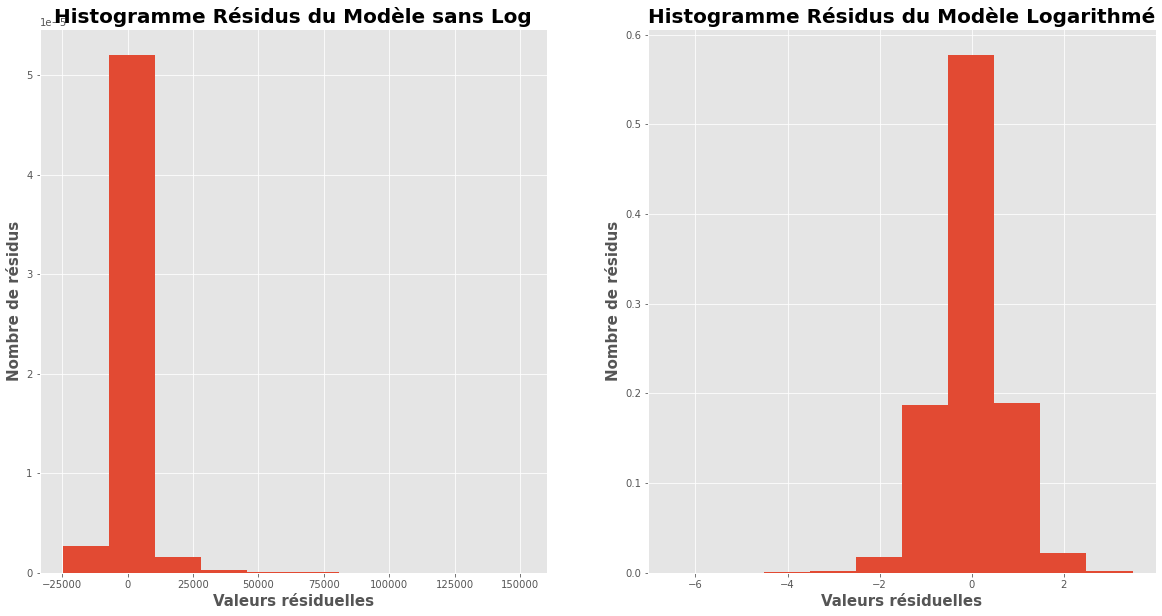

In [18]:
# Représentation graphique de la distribution de nos résidus
#Visualisation de la normalité des résidus : 
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.hist(lineaire_income.resid, density=True)
plt.xlabel('Valeurs résiduelles', fontsize=15, fontweight='bold')
plt.ylabel('Nombre de résidus', fontsize=15, fontweight='bold')
plt.title('Histogramme Résidus du Modèle sans Log', fontsize=20, fontweight='bold')

plt.subplot(122)
plt.hist(lineaire_ln_income.resid, density=True)
plt.xlabel('Valeurs résiduelles', fontsize=15, fontweight='bold')
plt.ylabel('Nombre de résidus', fontsize=15, fontweight='bold')
plt.title('Histogramme Résidus du Modèle Logarithmé', fontsize=20, fontweight='bold')

plt.savefig('Graphs/residus_distribution_model_ln_500.jpg')
plt.show()

Visuellement la distribution du modèle logarithmé ressemble plus à une distribution dites normale(qui suit une loi normale) que celui qui n'est pas à une échelle logarithmé. Vérifions ça dans le prochain point.

### Droite de Henry

Le graphique qqplot permet de vérifier la compatibilité de deux distributions. Dans notre cas, nous confrontons la distribution empirique des résidus avec la distribution théorique de la loi normale. On parle aussi de Droite de Henry. L’hypothèse nulle (normalité) est rejetée si la série de points s’écarte manifestement de la diagonale.

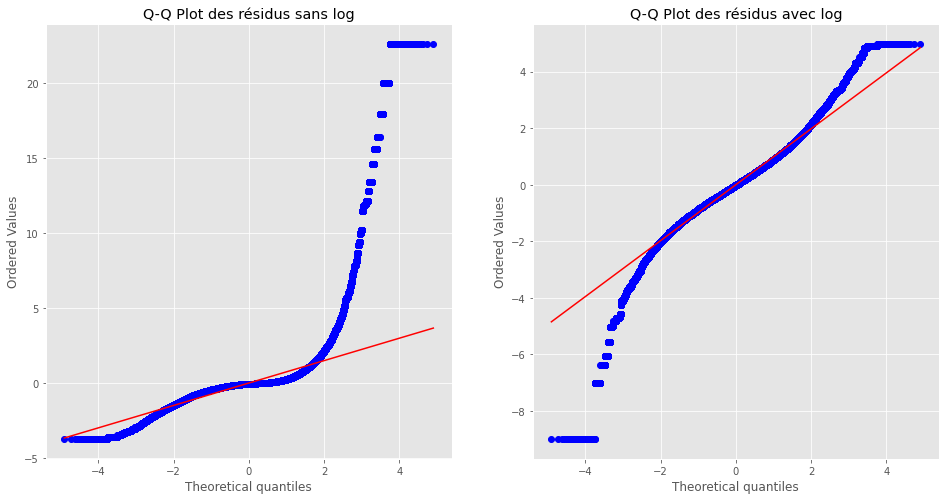

In [19]:
# Visualisation de la droite de Henry sur nos résidus
fig = plt.figure(figsize=(16,8))

# Calcul des résidus des valeur observé par rapport au variables prédite par notre régression linéaire
residus_sans_log = anova_income.get_influence().resid_studentized_internal
residus_avec_log = anova_ln_income.get_influence().resid_studentized_internal

plt.subplot(121)
QQ_sans_log = stats.probplot(residus_sans_log, plot = plt)
plt.title('Q-Q Plot des résidus sans log')

plt.subplot(122)
QQ_avec_log = stats.probplot(residus_avec_log, plot = plt)
plt.title('Q-Q Plot des résidus avec log')

plt.savefig('Graphs/QQplot_résidus')
plt.show()

Le graphique QQ-Plot démontre que nos résidus logarithmé ont plus de facilité à suivre une loi normale que ceux non logarithmé.

### Test de Kolmogorov-Smirnov pour savoir si nos résidus suivent une loi normale

Pour continuer nos tests statistiques commençons par émettre nos hypothèses :
   - H0 : Nos données suivent bien une loi normale < alpha = 0.05
   - H1 : Nos données ne suivent pas une loi normale > alpha = 0.05
        

Grâce à cela nous allons pouvoir réaliser nos tests et savoir si nos P-Value est supérieur ou non à notre seuil alpha.

In [20]:
# Vérifions la normalité des résidus de notre valeur non logarithmé
# Importation de la librairie nécessaire au test
from scipy.stats import ks_2samp

# Création des variables stockés les informations nécessaires au test du modèle non logaritmé
X_income = lineaire_income.resid
X_bar = X_income.mean()
Xsprime = X_income.std()

# Test de Kolmogorov-Smirnov car notre échantillon est plutôt volumineux (1.124.113 d'individus)
ks_2samp(lineaire_income.resid, list(np.random.normal(X_bar, Xsprime, 1_124_113)))

KstestResult(statistic=0.24630932260307492, pvalue=0.0)

In [21]:
# Création des variables stockés les informations nécessaires au test du modèle logaritmé
X_ln_income = lineaire_ln_income.resid
X_ln_bar = X_ln_income.mean()
X_ln_sprime = X_ln_income.std()

# Test de Kolmogorov-Smirnov car notre échantillon est plutôt volumineux (1.124.113 d'individus)
ks_2samp(lineaire_ln_income.resid, list(np.random.normal(X_ln_bar, X_ln_sprime, 1_124_113)))

KstestResult(statistic=0.037237108666551166, pvalue=0.0)

Notre pvalue est inférieur à 0.05%, ce qui nous fait rejeter notre hypothèse H0.

Certes nos données ne suivent pas une loi normale parfaite, néanmoins comme vu sur les précédent graphiques nos données ne sont pas absurdes et peuvent-être utilisé.

### Test de Colinéarité

Vérification d'une évantuelle colinéarité de nos variables, savoir si 2 variables explicatives expliques-t-elle la même variance ou non.

In [22]:
# Importation de la librairie
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [23]:
# Vérification d'une possible colinéarité de nos variables sur le modèle non logaritmé
variables = lineaire_income.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.1589186065015578, 1.1589186065015555]

In [24]:
# Vérification d'une possible colinéarité de nos variables sur le modèle non logaritmé
variables = lineaire_ln_income.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.08775538583335, 1.0877553858333509]

Notre test de colinéarité est négatif. Nos coefficients sont en dessous de 10, même de 5.

### Test d'Homoscédasticité

Ce test va nous permettre de savoir si nos variables explicatives ont un effet significatif sur la variable à expliquer. Dans ce cas, la variance de l'erreur est constante pour toutes les estimations.

In [25]:
__, pval, __, f_pval = sms.het_breuschpagan(lineaire_income.resid, lineaire_income.model.exog)
print('Modèle non logarithmé p value test Breusch-Pagan:', pval)

__, pval, __, f_pval = sms.het_breuschpagan(lineaire_ln_income.resid, lineaire_ln_income.model.exog)
print('Modèle logarithmé p value test Breusch-Pagan:', pval)

Modèle non logarithmé p value test Breusch-Pagan: 0.0
Modèle logarithmé p value test Breusch-Pagan: 0.0


H0 = Homoscédasticité
H1 = Hétéroscédasticité

pvalue < 0.05 alors nous rejettons l'hypothèse H0, il y a hétéroscédasticité des résidus, c-à-d que la variance des résidus dans nos variables sont différentes et non constante.

### Points atypiques et influents

Les points influents correspondent aux observations qui pèsent significativement, voire exagérément, sur les calculs. Ils déterminent, dans une proportion à évaluer, les résultats de la régression. Il convient de les considérer avec précaution au moins pour interpréter correctement les coefficients obtenus. Dans certains cas, on peut considérer qu’une observation pèse trop sur la régression au point d’altérer les paramètres estimés.

Les tests se feront à hauteur d'alpha = 5%

n étant le nombres d'individus dans mon échantillon et p le nombre de variable dans ma régression.

In [26]:
# Stockage de nos paramètre
alpha = 0.05
n = len(df_500)
p = 3

# Création d'une copie de notre dataframe
df_500_copy = df_500.copy()

### Analyse des leviers avec seuil

Le seuil des leviers est de 2 * p/n
Il est importants de savoir quelles observations peuvent fausser le résultats de la régression.

In [27]:
# Stockage du paramètre du seuil
seuil = 2*p/n

In [28]:
# Création d'une variable qui va stocker le résultat d'évantuelle individus qui pourrait fausser notre régression
df_500_copy['levier_non_log'] = lineaire_income.get_influence().hat_matrix_diag
df_500_copy['levier_log'] = lineaire_ln_income.get_influence().hat_matrix_diag

In [29]:
# Reduction de nos individus par pays pour un calcul plus rapide et une visualisation plus rapide
df_500_copy_levier = df_500_copy.groupby('country')[['country', 'levier_non_log', 'levier_log']].mean().reset_index()
df_500_copy_levier.head()

,country,levier_non_log,levier_log
0,Albania,0.000002,0.000001
1,Argentina,0.000002,0.000003
2,Armenia,0.000002,0.000002
3,Austria,0.000002,0.000002
4,Azerbaijan,0.000002,0.000001


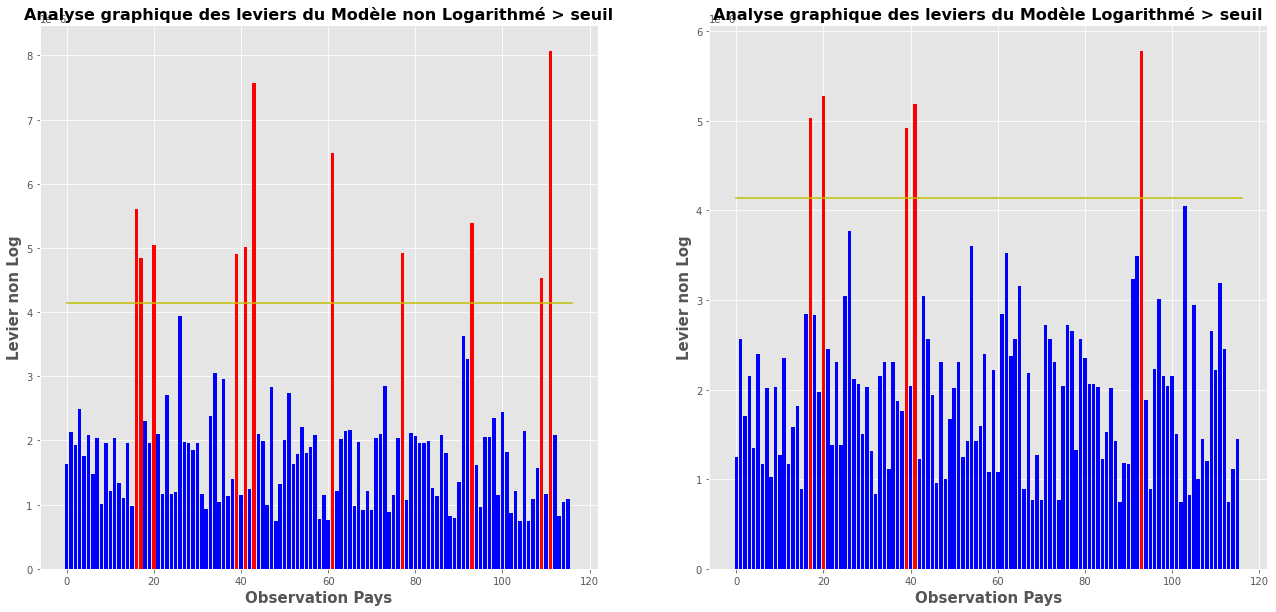

In [30]:
#Visualisation des leviers du Modèle non logarithmé par pays avec représentation du seuil
plt.figure(figsize=(22,10))

plt.subplot(121)
plt.bar(df_500_copy_levier.loc[df_500_copy_levier['levier_non_log'] <= seuil]['country'].index,
        df_500_copy_levier.loc[df_500_copy_levier['levier_non_log'] <= seuil]['levier_non_log'], color='b')
plt.bar(df_500_copy_levier.loc[df_500_copy_levier['levier_non_log'] > seuil]['country'].index,
        df_500_copy_levier.loc[df_500_copy_levier['levier_non_log'] > seuil]['levier_non_log'], color='r')
plt.plot([0, 116], [seuil, seuil], color='y')

plt.xlabel('Observation Pays', fontsize=15, fontweight='bold')
plt.ylabel('Levier non Log', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des leviers du Modèle non Logarithmé > seuil', fontsize=16, fontweight='bold')

plt.subplot(122)
plt.bar(df_500_copy_levier.loc[df_500_copy_levier['levier_log'] <= seuil]['country'].index,
        df_500_copy_levier.loc[df_500_copy_levier['levier_log'] <= seuil]['levier_log'], color='b')
plt.bar(df_500_copy_levier.loc[df_500_copy_levier['levier_log'] > seuil]['country'].index,
        df_500_copy_levier.loc[df_500_copy_levier['levier_log'] > seuil]['levier_log'], color='r')
plt.plot([0, 116], [seuil, seuil], color='y')

plt.xlabel('Observation Pays', fontsize=15, fontweight='bold')
plt.ylabel('Levier non Log', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des leviers du Modèle Logarithmé > seuil', fontsize=16, fontweight='bold')

plt.savefig('Graphs/levier_model1.jpg')
plt.show()

A première vu le modèle logarithmé est encore le plus intérressant, observons les pays qui sort de notre seuil.

In [31]:
print("Les pays qui ont un seuil trop élevé dans notre modèle non logaritmé")
display(df_500_copy_levier[df_500_copy_levier['levier_non_log'] > seuil]['country'])
print('------------------------------')
print("Les pays qui ont un seuil trop élevé dans notre modèle logaritmé")
display(df_500_copy_levier[df_500_copy_levier['levier_log'] > seuil]['country'])

Les pays qui ont un seuil trop élevé dans notre modèle non logaritmé


16              Canada
17     Central African
20            Colombia
39           Guatemala
41            Honduras
43             Iceland
61          Luxembourg
77              Norway
93        South Africa
109     United Kingdom
111      United States
Name: country, dtype: object

------------------------------
Les pays qui ont un seuil trop élevé dans notre modèle logaritmé


17    Central African
20           Colombia
39          Guatemala
41           Honduras
93       South Africa
Name: country, dtype: object

In [32]:
#Pourcentage de pays hors seuil levier
print("Modèle 1: " + str(round(len(df_500_copy_levier[df_500_copy_levier['levier_non_log'] 
                    > seuil])/len(df_500_copy_levier['levier_non_log'])*100, 2)) + '%')
print("Modèle 2 (avec log): " + str(round(len(df_500_copy_levier[df_500_copy_levier['levier_log'] 
                    > seuil])/len(df_500_copy_levier['levier_log'])*100, 2)) + '%')

Modèle 1: 9.48%
Modèle 2 (avec log): 4.31%


Le Modèle 2, avec un R² = 0.728, est globalement significatif à 5%. En comparaison le premier Modèle, sans logarithme, se révèle être moins significatif. Son R² = 0.500 plus faible mais avec le diagnostic des leviers, on constate également qu'un plus grand nombre de pays viennent influencer le Modèle 1 (9.48% contre 4.31% avec le Modèle 2), donc sa performance est moins optimale.

### Analyse des résidus studentisé

Le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté.

Il est nécessaire d'observer le rôle conjoint du levier et du résidu standardisé.

In [33]:
# Création de nouvelles variables qui va stocké le calcul des résidus studentisé
df_500_copy['rstudent_non_log'] = lineaire_income.get_influence().resid_studentized_internal
df_500_copy['rstudent_log'] = lineaire_ln_income.get_influence().resid_studentized_internal

seuil_rstudent = st.t.ppf(1-alpha/2,n-p-1) # n-p-1 est le degré de liberté(ddl)

In [34]:
# Simplification de notre dataframe pour une meilleur visiblité
df_500_copy_rstudent = df_500_copy.groupby(['country', 'quantile']).mean().reset_index()
df_500_copy_rstudent

,country,quantile,mj,income,Gj,pj,y_child,y_parents,c_i_parent,ln_income,ln_mj,levier_non_log,levier_log,rstudent_non_log,rstudent_log
0,Albania,1,2994.800049,728.900024,0.3,0.8,1.432298,2.415606,50.611111,6.6,8.0,0.000002,0.000001,-0.338887,-1.731810
1,Albania,2,2994.800049,916.700012,0.3,0.8,1.641318,1.565587,50.227642,6.8,8.0,0.000002,0.000001,-0.310769,-1.454600
2,Albania,3,2994.800049,1010.900024,0.3,0.8,1.564903,1.524433,51.386555,6.9,8.0,0.000002,0.000001,-0.296665,-1.315996
3,Albania,4,2994.800049,1086.900024,0.3,0.8,1.682787,1.450701,49.268657,7.0,8.0,0.000002,0.000001,-0.285286,-1.177392
4,Albania,5,2994.800049,1132.699951,0.3,0.8,1.477147,1.735616,52.390977,7.0,8.0,0.000002,0.000001,-0.278429,-1.177392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,Yemen,96,1042.599976,2568.699951,0.4,0.4,1.806617,1.732232,50.283582,7.9,6.9,0.000001,0.000001,0.228857,1.775534
11596,Yemen,97,1042.599976,2893.899902,0.4,0.4,1.687613,1.993891,52.257576,8.0,6.9,0.000001,0.000001,0.277547,1.914138
11597,Yemen,98,1042.599976,3307.300049,0.4,0.4,1.828078,1.868695,52.078014,8.1,6.9,0.000001,0.000001,0.339443,2.052743
11598,Yemen,99,1042.599976,4137.000000,0.4,0.4,1.790308,1.714085,50.333333,8.3,6.9,0.000001,0.000001,0.463670,2.329952


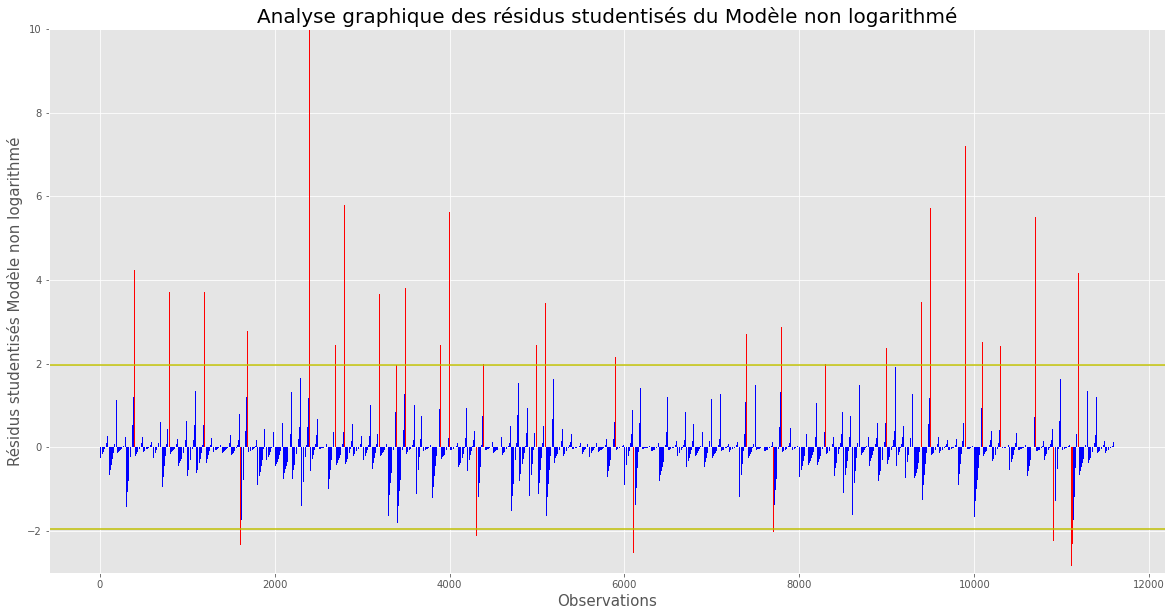

In [35]:
#Visualisation globale des résidus studentisés du Modèle non logarithmé avec représentation du seuil
plt.figure(figsize=(20,10))


plt.bar(df_500_copy_rstudent[(df_500_copy_rstudent['rstudent_non_log'] <= seuil_rstudent) & 
                             (df_500_copy_rstudent['rstudent_non_log'] >= -seuil_rstudent)]['country'].index,
        df_500_copy_rstudent[(df_500_copy_rstudent['rstudent_non_log'] <= seuil_rstudent) &
                             (df_500_copy_rstudent['rstudent_non_log'] >= -seuil_rstudent)]['rstudent_non_log'], color='b')

plt.bar(df_500_copy_rstudent[df_500_copy_rstudent['rstudent_non_log'] > seuil_rstudent]['country'].index, 
        df_500_copy_rstudent[df_500_copy_rstudent['rstudent_non_log'] > seuil_rstudent]['rstudent_non_log'], color='r')
plt.bar(df_500_copy_rstudent[df_500_copy_rstudent['rstudent_non_log'] < -seuil_rstudent]['country'].index, 
        df_500_copy_rstudent[df_500_copy_rstudent['rstudent_non_log'] < -seuil_rstudent]['rstudent_non_log'], color='r')


# Mise en place du seuil studentisé(1.9599), pour délimiter les valeurs qui sort de ce seuil
plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15)
plt.ylabel('Résidus studentisés Modèle non logarithmé', fontsize=15)
plt.title('Analyse graphique des résidus studentisés du Modèle non logarithmé', fontsize=20)

plt.ylim(-3, 10)
plt.savefig('Graphs/residus_studentises_modele_non_logarithmé.jpg')
plt.show()

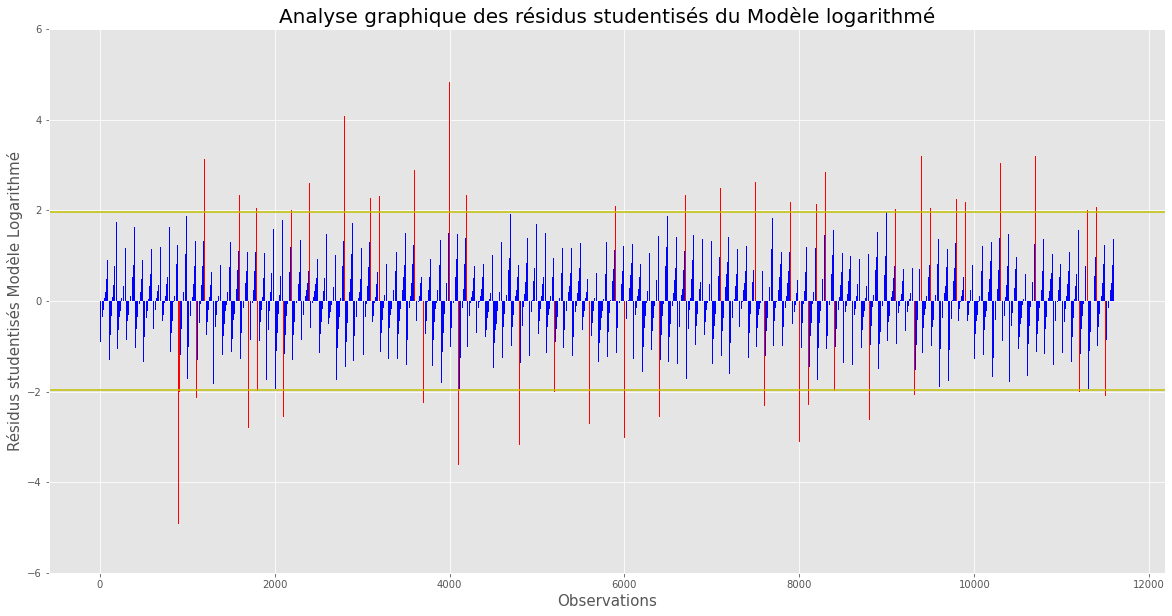

In [36]:
#Visualisation globale des résidus studentisés du Modèle logarithmé avec représentation du seuil
plt.figure(figsize=(20,10))


plt.bar(df_500_copy_rstudent[(df_500_copy_rstudent['rstudent_log'] <= seuil_rstudent) & 
                             (df_500_copy_rstudent['rstudent_log'] >= -seuil_rstudent)]['country'].index,
        df_500_copy_rstudent[(df_500_copy_rstudent['rstudent_log'] <= seuil_rstudent) &
                             (df_500_copy_rstudent['rstudent_log'] >= -seuil_rstudent)]['rstudent_log'], color='b')

plt.bar(df_500_copy_rstudent[df_500_copy_rstudent['rstudent_log'] > seuil_rstudent]['country'].index, 
        df_500_copy_rstudent[df_500_copy_rstudent['rstudent_log'] > seuil_rstudent]['rstudent_log'], color='r')
plt.bar(df_500_copy_rstudent[df_500_copy_rstudent['rstudent_log'] < -seuil_rstudent]['country'].index, 
        df_500_copy_rstudent[df_500_copy_rstudent['rstudent_log'] < -seuil_rstudent]['rstudent_log'], color='r')


# Mise en place du seuil studentisé(1.9599), pour délimiter les valeurs qui sort de ce seuil
plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15)
plt.ylabel('Résidus studentisés Modèle Logarithmé', fontsize=15)
plt.title('Analyse graphique des résidus studentisés du Modèle logarithmé', fontsize=20)

plt.ylim(-6, 6)
plt.savefig('Graphs/residus_studentises_modele_logarithmé.jpg')
plt.show()

Aucune conclusion peut être menée à partir de ses deux derniers graphiques, chacun à plusieurs valeurs qui sortent du seuil ce qui ne nous indique pas quel modèle est le plus performant.

In [37]:
# Comparaisons du nombre de valeurs sortant du seuil/influentes entre les deux modèles
print(str(len(df_500_copy_rstudent[(df_500_copy_rstudent['rstudent_non_log'] > seuil_rstudent) |
                               (df_500_copy_rstudent['rstudent_non_log'] < -seuil_rstudent)])),
                                'Valeurs influentes dans le modèle non logarithmé')

print(str(len(df_500_copy_rstudent[(df_500_copy_rstudent['rstudent_log'] > seuil_rstudent) |
                               (df_500_copy_rstudent['rstudent_log'] < -seuil_rstudent)])),
                                'Valeurs influentes dans le modèle logarithmé')

411 Valeurs influentes dans le modèle non logarithmé
646 Valeurs influentes dans le modèle logarithmé


In [38]:
# Comparons le pourcentage de valeurs influentes dans nos modèles
print('Modèle non logarithmé : ' + str((round(428 / len(df_500_copy_rstudent) * 100, 2))) + '%')
print('Modèle logarithmé : ' + str((round(647 / len(df_500_copy_rstudent) * 100, 2))) + '%')

Modèle non logarithmé : 3.69%
Modèle logarithmé : 5.58%


Résumons les résultats obtenus sur nos test de valeurs influentes, Le modèle logarithmé reste favoris par rapport à celui non logarithmé, car nous avons moins de levier d'influence sur le modèle logarithmé à hauteur de 4.3% contre 9.5% pour le modèle non logarithmé, nous avons une meilleur idée des pays influents dans notre modèle logarithmé mais aussi une meilleur variance expliqué.

### Distance de Cook

Ce test va nous permettre de visualiser de potentielle valeurs aberrantes qui mériterons une étude.

In [39]:
# Récupération des valeurs influentes dans notre modèle de régresion
influence_non_log = lineaire_income.get_influence()
influence_log = lineaire_ln_income.get_influence()

# Stockage du calcul de la distance de cook pour chaque observations
cooks1 = influence_non_log.cooks_distance[0]
cooks2 = influence_log.cooks_distance[0]

# Création de nouvelles variables dans notre dataframe
df_500_copy['cook_non_log'] = cooks1
df_500_copy['cook_log'] = cooks2

In [40]:
# Définir le seuil de la distance de cook qui est exprimé comme :
seuil_dcook = 4/(n-p)

In [41]:
# Simplification de notre dataframe pour une meilleur visiblité
df_500_copy_dcook = df_500_copy.groupby(['country', 'quantile']).mean().reset_index()

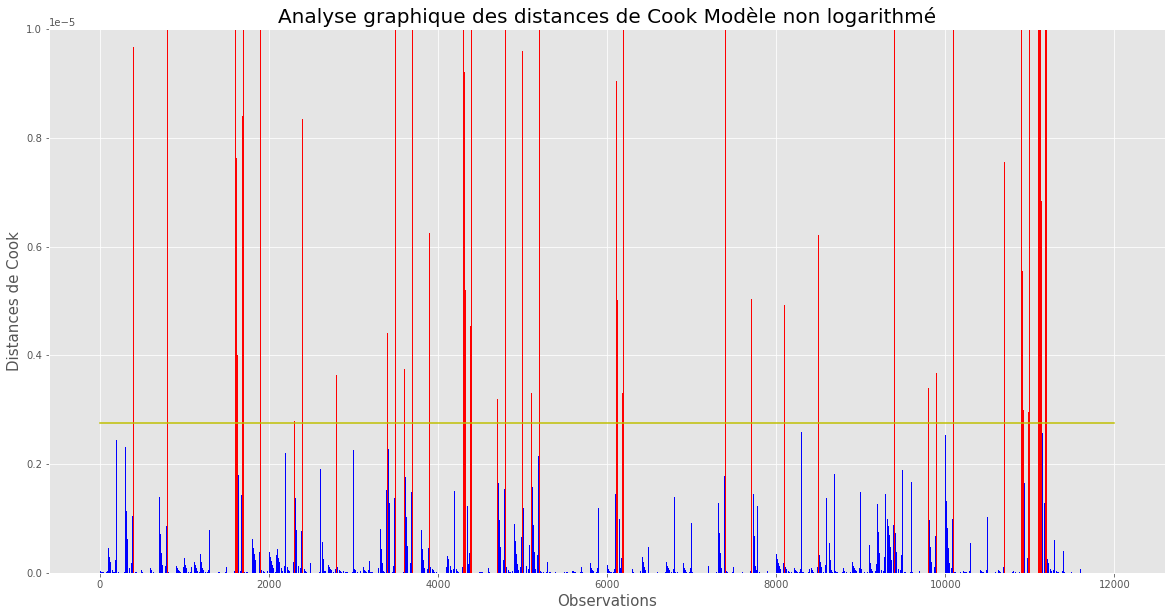

In [42]:
#Visualisation globale des distances de Cook du Modèle non logarithmé avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(df_500_copy_dcook.loc[df_500_copy_dcook['cook_non_log'] < seuil_dcook]['country'].index,
        df_500_copy_dcook.loc[df_500_copy_dcook['cook_non_log'] < seuil_dcook]['cook_non_log'], color='b')
plt.bar(df_500_copy_dcook.loc[df_500_copy_dcook['cook_non_log'] >= seuil_dcook]['country'].index,
        df_500_copy_dcook.loc[df_500_copy_dcook['cook_non_log'] >= seuil_dcook]['cook_non_log'], color='r')

plt.plot([0, 12000], [seuil_dcook, seuil_dcook], color='y')
plt.ylim(0, 0.000010)

plt.xlabel('Observations', fontsize=15)
plt.ylabel('Distances de Cook', fontsize=15)
plt.title('Analyse graphique des distances de Cook Modèle non logarithmé', fontsize=20)

plt.savefig('Graphs/dcook_model_non_log.jpg')
plt.show()

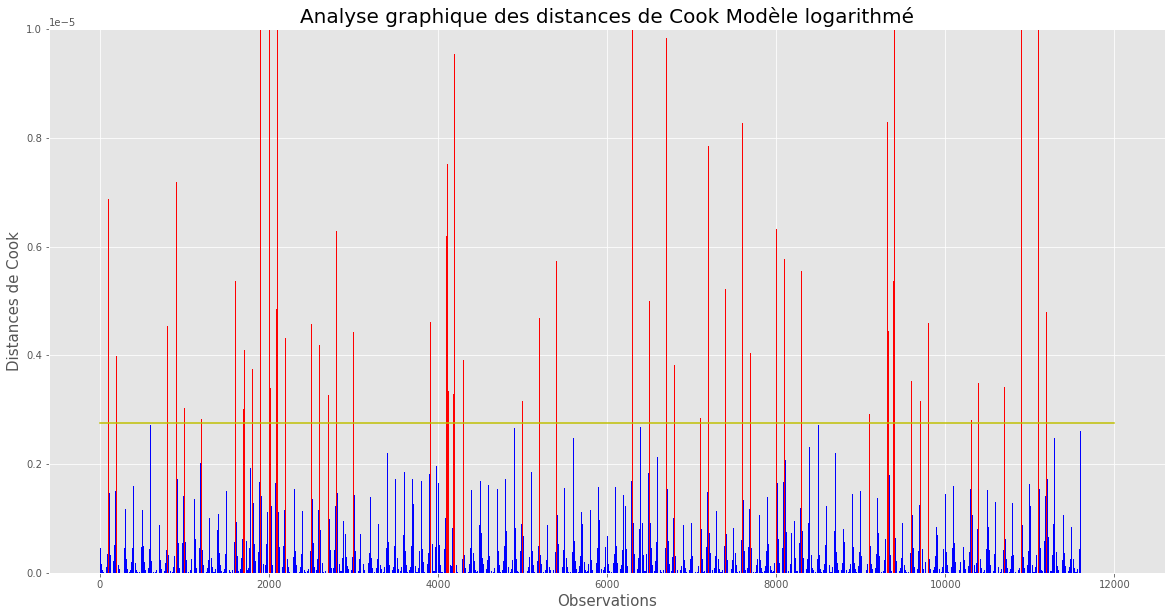

In [43]:
#Visualisation globale des distances de Cook du Modèle logarithmé avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(df_500_copy_dcook.loc[df_500_copy_dcook['cook_log'] < seuil_dcook]['country'].index,
        df_500_copy_dcook.loc[df_500_copy_dcook['cook_log'] < seuil_dcook]['cook_log'], color='b')
plt.bar(df_500_copy_dcook.loc[df_500_copy_dcook['cook_log'] >= seuil_dcook]['country'].index,
        df_500_copy_dcook.loc[df_500_copy_dcook['cook_log'] >= seuil_dcook]['cook_log'], color='r')

plt.plot([0, 12000], [seuil_dcook, seuil_dcook], color='y')
plt.ylim(0, 0.000010)

plt.xlabel('Observations', fontsize=15)
plt.ylabel('Distances de Cook', fontsize=15)
plt.title('Analyse graphique des distances de Cook Modèle logarithmé', fontsize=20)

plt.savefig('Graphs/dcook_model_log.jpg')
plt.show()

In [44]:
# Comparaisons du nombre de valeurs sortant du seuil/influentes entre les deux modèles
print(str(len(df_500_copy_dcook[(df_500_copy_dcook['cook_non_log'] > seuil_dcook)])),
                                'Valeurs influentes dans le modèle non logarithmé')

print(str(len(df_500_copy_dcook[(df_500_copy_dcook['cook_log'] > seuil_dcook)])),
                                'Valeurs influentes dans le modèle logarithmé')

585 Valeurs influentes dans le modèle non logarithmé
683 Valeurs influentes dans le modèle logarithmé


In [45]:
# Comparons le pourcentage de valeurs influentes dans nos modèles
print('Modèle non logarithmé : ' + str((round(605 / len(df_500_copy_dcook) * 100, 2))) + '%')
print('Modèle logarithmé : ' + str((round(672 / len(df_500_copy_dcook) * 100, 2))) + '%')

Modèle non logarithmé : 5.22%
Modèle logarithmé : 5.79%


En résumé, de notre analyse de la distance de Cook nos deux modèles sont plutôt équivalent à hauteur de 5%.

## Amélioration du modèle le plus performant en incluant la classe de revenu des parents

In [46]:
# Ajout de la variable 'c_i_parent' à notre régression linéaire sur nos données logarithmé
lineaire_final = smf.ols('ln_income ~ Gj + c_i_parent + ln_mj', data = df_500).fit(alpha=alpha)
lineaire_final.summary().tables[0]

Dep. Variable:,ln_income,R-squared:,0.727
Model:,OLS,Adj. R-squared:,0.727
Method:,Least Squares,F-statistic:,1.289e+06
Date:,"Fri, 18 Mar 2022",Prob (F-statistic):,0.00
Time:,18:10:47,Log-Likelihood:,-1.5841e+06
No. Observations:,1450000,AIC:,3.168e+06
Df Residuals:,1449996,BIC:,3.168e+06
Df Model:,3,,
Covariance Type:,nonrobust,,


Aucune influence de notre variable 'c_i_parent' sur notre variable dépendente 'ln_income'.

In [47]:
decomp_lineaire_final = sms.anova_lm(lineaire_final, typ=2)
decomp_lineaire_final

,sum_sq,df,F,PR(>F)
Gj,2.442120e+04,1.0,4.691604e+04,0.000000
c_i_parent,1.367570e+00,1.0,2.627265e+00,0.105043
ln_mj,1.709946e+06,1.0,3.285010e+06,0.000000
Residual,7.547662e+05,1449996.0,NaN,NaN


In [48]:
#SCT
print('SCT = ' + str(decomp_lineaire_final.values[:,0].sum()))

#SCE
print('SCE = ' + str(decomp_lineaire_final.values[0,0] + decomp_lineaire_final.values[1,0] + decomp_lineaire_final.values[2,0]))

#SCR
print('SCR = ' + str(decomp_lineaire_final.values[2,0]))

#R2 squared
print('R² = ' + str((decomp_lineaire_final.values[0,0] + decomp_lineaire_final.values[1,0] + decomp_lineaire_final.values[2,0]) / decomp_lineaire_final.values[:,0].sum()))

#Variance expliquée par le revenu moyen du pays (ln_mj)
print("La variable 'ln_mj' explique : {}% de la variance".format(round(sm.stats.anova_lm(lineaire_final, typ=2).values[2,0] / decomp_lineaire_final.values[:,0].sum(), 3)))

#Variance expliquée par l'indice de Gini
print("La variable 'Gj' explique : {}% de la variance".format(round(sm.stats.anova_lm(lineaire_final, typ=2).values[0,0] / decomp_lineaire_final.values[:,0].sum(), 3)))

#Variance expliquée par la classe de revenus des parents
print("La variable 'c_i_parent' explique : {}% de la variance".format(round(sm.stats.anova_lm(lineaire_final, typ=2).values[1,0] / decomp_lineaire_final.values[:,0].sum(), 3)))

#Les résidus
print("Les résidus explique : {}% de la variance".format(round(sm.stats.anova_lm(lineaire_final, typ=2).values[3,0] / decomp_lineaire_final.values[:,0].sum(), 3)))

SCT = 2489134.5058060978
SCE = 1734368.2865467283
SCR = 1709945.7190797818
R² = 0.6967756392839282
La variable 'ln_mj' explique : 0.687% de la variance
La variable 'Gj' explique : 0.01% de la variance
La variable 'c_i_parent' explique : 0.0% de la variance
Les résidus explique : 0.303% de la variance
